In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression



In [2]:

just_join = pd.read_csv('job_offers_just_join.csv')
pracuj_pl = pd.read_csv('job_offers.csv')


In [8]:
# Polaczone tabele
tabela = pd.concat([just_join, pracuj_pl], ignore_index=True)

# Podgląd wyniku
display(tabela.head(10))

,Tytuł,Firma,Data opublikowania,Wynagrodzenie,Technologie,Link
0,Lead Java Engineer,N-iX,2025-01-08,25 392 - 30 716 pln,"['Fully remote', 'Spring Boot', 'Maven', 'Java']",https://justjoin.it/job-offer/n-ix-lead-java-e...
1,Senior C++ Software Engineer,HERE Technologies,2025-01-08,14 000 - 20 000 pln,"['Fully remote', 'C++', 'Python', 'TypeScript']",https://justjoin.it/job-offer/here-technologie...
2,Senior DevOps Engineer (AWS),Future Processing,2025-01-08,21 000 - 33 200 pln,"['Fully remote', 'AWS', 'Terraform', 'Kubernet...",https://justjoin.it/job-offer/future-processin...
3,Lead Data Engineer (Snowflake),N-iX,2025-01-08,26 620 - 32 764 pln,"['Fully remote', 'Cloud', 'DBT', 'SQL']",https://justjoin.it/job-offer/n-ix-lead-data-e...
4,QA Engineer,AVSystem,2025-01-08,10 000 - 18 000 pln,"['Networks', 'Gatling', 'Scripting language']",https://justjoin.it/job-offer/avsystem-qa-engi...
5,C++ Developer (Tuxedo),Experis Manpower Group,2025-01-08,26 880 - 28 560 pln,"['Fully remote', 'C++', 'Tuxedo']",https://justjoin.it/job-offer/experis-manpower...
6,Senior ReactJS Developer (with backend experie...,USEO Sp. z o.o.,2025-01-08,19 200 - 22 400 pln,"['Fully remote', 'ReactJS', 'TypeScript', 'CSS3']",https://justjoin.it/job-offer/useo-sp-z-o-o--s...
7,Data Engineer,Kitopi,2025-01-04,16 000 - 24 000 pln,"['Polish', 'English', 'Python']",https://justjoin.it/job-offer/kitopi-data-engi...
8,Angular Developer (Mid/Senior),Experis Manpower Group,2025-01-08,20 160 - 30 240 pln,"['Fully remote', 'TypeScript', 'RxJS', 'UI/UX']",https://justjoin.it/job-offer/experis-manpower...
9,Front-end Developer,Weegree Sp. z o.o.,2025-01-08,8 500 - 12 500 pln,"['HTML5', 'CSS3', 'React']",https://justjoin.it/job-offer/weegree-sp-z-o-o...


In [23]:
# Zliczanie ogłoszeń z podanym wynagrodzeniem
with_salary = tabela[tabela['Wynagrodzenie'] != 'Brak wynagrodzenia'].shape[0]

# Zliczanie ogłoszeń bez podanego wynagrodzenia
without_salary = tabela[tabela['Wynagrodzenie'] == 'Brak wynagrodzenia'].shape[0]

print(f"Liczba ogłoszeń z podanym wynagrodzeniem: {with_salary}")
print(f"Liczba ogłoszeń bez podanego wynagrodzenia: {without_salary}")

# Zliczanie ogłoszeń z podanym wynagrodzeniem wskaźnik procentowy
with_salary_percent = with_salary / tabela.shape[0] * 100
print(f"Procent ogłoszeń z podanym wynagrodzeniem: {with_salary_percent:.2f}%")

# Zliczanie ogłoszeń bez podanego wynagrodzenia wskaźnik procentowy
without_salary_percent = without_salary / tabela.shape[0] * 100
print(f"Procent ogłoszeń bez podanego wynagrodzenia: {without_salary_percent:.2f}%")

import re

# Wyodrębnienie pierwszej liczby z kolumny 'Wynagrodzenie'
tabela['Pierwsza_liczba'] = tabela['Wynagrodzenie'].apply(lambda x: int(re.findall(r'\d+', x.replace(' ', '').replace('zł', '').replace('pln', ''))[0]) if re.findall(r'\d+', x.replace(' ', '').replace('zł', '').replace('pln', '')) else None)
tabela['Druga_liczba'] = tabela['Wynagrodzenie'].apply(lambda x: int(re.findall(r'\d+', x.replace(' ', '').replace('zł', '').replace('pln', ''))[1]) if len(re.findall(r'\d+', x.replace(' ', '').replace('zł', '').replace('pln', ''))) > 1 else None)

# Zliczanie ofert pracy z wynagrodzeniem powyżej 10000 pln
above_10000 = tabela[tabela['Pierwsza_liczba'] > 10000].shape[0]
print(f"Liczba ofert pracy z wynagrodzeniem powyżej 10000 zł: {above_10000}")
print(f"Procent ofert pracy z wynagrodzeniem powyżej 10000zł: {above_10000 / tabela.shape[0] * 100:.2f}%")

# Find the row with the highest salary
highest_offer_row = tabela.loc[tabela['Pierwsza_liczba'].idxmax()]
highest_offer = highest_offer_row['Pierwsza_liczba']

print(f"Ogłoszenie z najwyższym wynagrodzeniem: \n{highest_offer_row}")

lowest_offer_row = tabela.loc[tabela['Pierwsza_liczba'].idxmin()]
# Sort the table by the 'Pierwsza_liczba' column to find the lowest offers
lowest_offers = tabela.sort_values(by='Pierwsza_liczba').head(5)

print("5 ofert z najniższym wynagrodzeniem:")
print(lowest_offers[['Tytuł', 'Firma', 'Wynagrodzenie', 'Pierwsza_liczba']])
lowest_offer = highest_offer_row['Pierwsza_liczba']

#print(f"Ogłoszenie z najwyższym wynagrodzeniem: \n{lowest_offer_row}")


Liczba ogłoszeń z podanym wynagrodzeniem: 390
Liczba ogłoszeń bez podanego wynagrodzenia: 261
Procent ogłoszeń z podanym wynagrodzeniem: 59.91%
Procent ogłoszeń bez podanego wynagrodzenia: 40.09%
Liczba ofert pracy z wynagrodzeniem powyżej 10000 zł: 290
Procent ofert pracy z wynagrodzeniem powyżej 10000zł: 44.55%
Ogłoszenie z najwyższym wynagrodzeniem: 
Tytuł                                          Cloud Operation Engineer
Firma                                                          LetzCode
Data opublikowania                                           2025-01-08
Wynagrodzenie                                       34 000 - 36 000 pln
Technologie           ['Fully remote', 'Troubleshooting', 'Communica...
Link                  https://justjoin.it/job-offer/letzcode-cloud-o...
Pierwsza_liczba                                                 34000.0
Druga_liczba                                                    36000.0
Name: 100, dtype: object
5 ofert z najniższym wynagrodzeniem:
      

In [19]:
from collections import Counter

tabela['Technologie'] = tabela['Technologie'].replace('Brak technologii', '""')

wynik = tabela['Technologie'].explode().value_counts()
# Explode the 'Technologie' column and count the occurrences of each technology
technologie_list = tabela['Technologie'].dropna().apply(eval).explode()
wynik = Counter(technologie_list)

print(wynik)

Counter({'Fully remote': 217, '': 130, 'SQL': 100, 'Python': 72, 'Java': 59, 'JavaScript': 54, 'Linux': 36, 'English': 33, 'AWS': 28, 'C#': 28, 'Git': 27, 'TypeScript': 26, 'PostgreSQL': 22, 'Active Directory': 19, 'C++': 18, 'Jira': 18, 'Node.js': 17, 'C': 17, 'Spring Boot': 16, 'React': 16, 'Docker': 15, 'CSS': 14, 'Confluence': 13, 'MySQL': 13, 'HTML': 13, '.NET': 13, 'Oracle': 12, 'Azure': 12, 'Kotlin': 12, 'Windows Server': 12, 'Kubernetes': 10, 'MS SQL': 10, 'Spring': 10, 'PHP': 9, 'Angular': 9, 'CI/CD': 8, 'Hibernate': 8, 'Power BI': 8, '.Net': 8, 'Microsoft Excel': 8, 'Terraform': 7, 'Cloud': 7, 'SAP S/4 HANA': 7, 'Elasticsearch': 7, 'Apache Kafka': 7, 'React Native': 6, 'Azure Data Factory': 6, 'SAP': 6, 'Windows': 6, 'UML': 6, 'BPMN': 6, 'Polish': 5, 'Golang': 5, 'Data analysis': 5, 'Power Automate': 5, 'Databases': 5, 'NoSQL': 5, 'Tableau': 5, 'Databricks': 5, 'Security': 5, 'Software Architecture': 5, 'iOS': 5, 'Communication': 5, 'Playwright': 5, 'Software Development': 5,

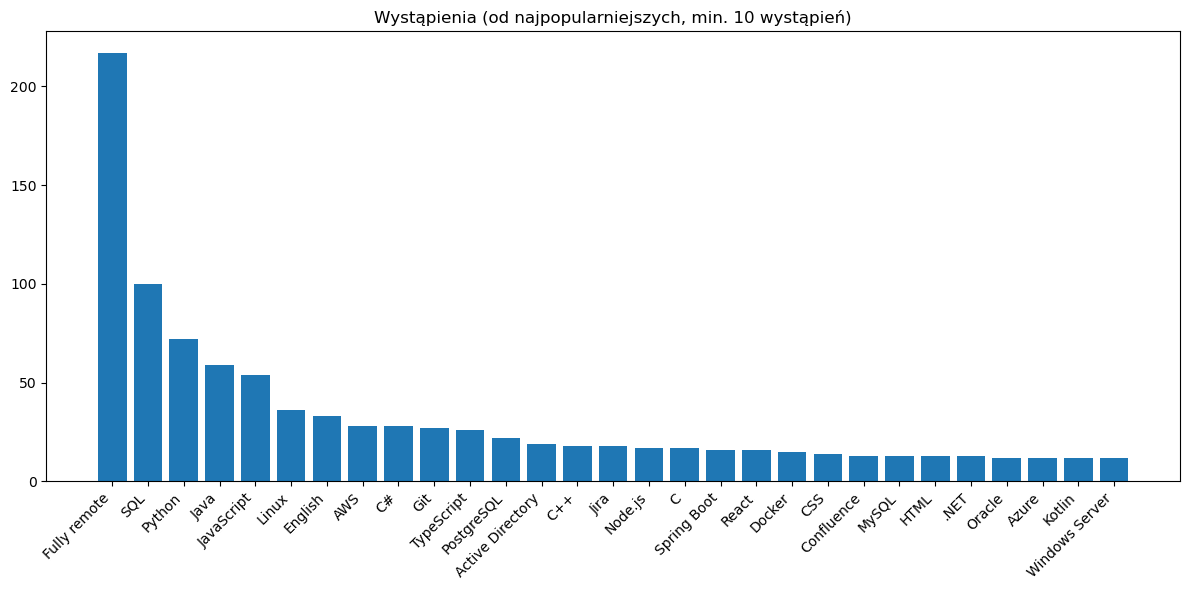

In [38]:
import matplotlib.pyplot as plt

filtered_counts = {tech: count for tech, count in wynik.items() if count > 10}
# Usunięcie pustej wartości w kolumnie
filtered_counts.pop('', None)
sorted_data = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)

labels, counts = zip(*sorted_data)

plt.figure(figsize=(12, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Wystąpienia (od najpopularniejszych, min. 10 wystąpień)")
plt.tight_layout()
plt.show()

In [30]:
# Przekształcenie kolumny 'Technologie' na format odpowiedni do obliczeń
technologie_dummies = tabela['Technologie'].str.get_dummies(sep=', ')

# Dodanie kolumny z pierwszą liczbą wynagrodzenia do tabeli technologii
technologie_dummies['Pierwsza_liczba'] = tabela['Pierwsza_liczba']

# Obliczenie korelacji pomiędzy technologiami a zarobkami
correlation_matrix = technologie_dummies.corr()

# Wyświetlenie korelacji pomiędzy technologiami a zarobkami
correlation_with_salary = correlation_matrix['Pierwsza_liczba'].drop('Pierwsza_liczba')
#print(correlation_with_salary)
# Wyświetlenie 5 technologii z najwyższą korelacją z zarobkami
top_5_technologies = correlation_with_salary.abs().sort_values(ascending=False).head(5)
print(top_5_technologies)

worst_5_technologies = correlation_with_salary.abs().sort_values(ascending=True).head(5)
print(worst_5_technologies)


['Fully remote'       0.529012
""                    0.372359
'English'             0.184652
'Cloud']              0.176842
'Data Engineering'    0.159378
Name: Pierwsza_liczba, dtype: float64
'Azure']                 0.000641
'SDLC'                   0.000714
'Microsoft 365'          0.000714
'Project Management']    0.000714
'C#']                    0.000730
Name: Pierwsza_liczba, dtype: float64


Firma
Experis Manpower Group                     75
SCALO                                      22
N-iX                                       10
Accenture Technology                       10
Samsung R&D Institute Poland               10
Code and Pepper                             9
ER Group                                    9
Tylko                                       8
HTD                                         8
Concentrix CVG International Sp. z o.o.     6
Macrix Polska                               6
QED.ai                                      6
Syberry                                     6
Acaisoft                                    5
Jit Team                                    5
Name: count, dtype: int64


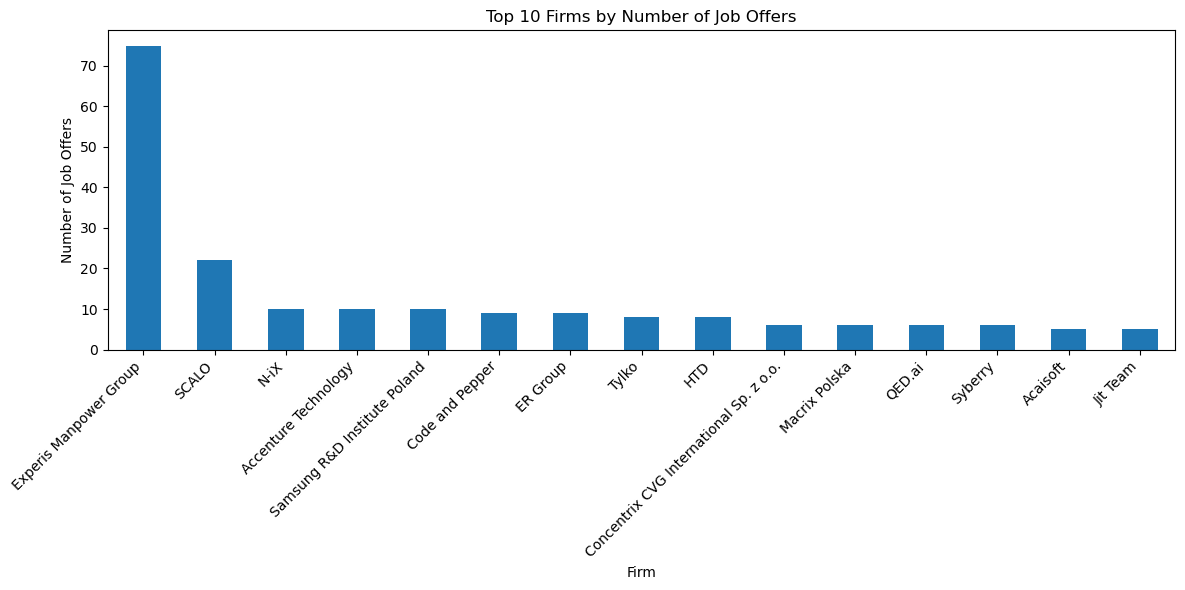

In [34]:
top_10_firms = tabela['Firma'].value_counts().head(15)
print(top_10_firms)
top_10_firms.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Firms by Number of Job Offers')
plt.xlabel('Firm')
plt.ylabel('Number of Job Offers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
experis_offers = tabela[tabela['Firma'] == 'Experis Manpower Group'].head(20)
print(experis_offers)

                                              Tytuł                   Firma  \
5                            C++ Developer (Tuxedo)  Experis Manpower Group   
8                    Angular Developer (Mid/Senior)  Experis Manpower Group   
11                              Front-end Architect  Experis Manpower Group   
12                          SAP Security Consultant  Experis Manpower Group   
13                               SAP ABAP Developer  Experis Manpower Group   
17                              SAP Fiori Developer  Experis Manpower Group   
21                           SAP Finance Consultant  Experis Manpower Group   
22                             SAP SD/MM Consultant  Experis Manpower Group   
23                SAP (WM/EWM) Logistics Consultant  Experis Manpower Group   
24        Power Apps Developer (MS Dynamics 365 CE)  Experis Manpower Group   
26  Identity and Access Management Support Engineer  Experis Manpower Group   
28                      Senior Scala/Java Developer 

In [41]:
# ...existing code...
import re

# Usuwanie niepotrzebnych znaków i wyodrębnianie liczb
tabela['Wynagrodzenie_min'] = tabela['Wynagrodzenie'].apply(
    lambda x: int(re.findall(r'\d+', x.replace(' ', '').replace('zł', '').replace('pln', ''))[0])
    if re.findall(r'\d+', x.replace(' ', '').replace('zł', '').replace('pln', '')) else None
)
tabela['Wynagrodzenie_max'] = tabela['Wynagrodzenie'].apply(
    lambda x: int(re.findall(r'\d+', x.replace(' ', '').replace('zł', '').replace('pln', ''))[-1])
    if len(re.findall(r'\d+', x.replace(' ', '').replace('zł', '').replace('pln', ''))) > 1 else None
)

# Możesz też obliczać średnią w dodatkowej kolumnie
tabela['Wynagrodzenie_avg'] = tabela[['Wynagrodzenie_min', 'Wynagrodzenie_max']].mean(axis=1)
# ...existing code...

In [42]:
print(tabela['Wynagrodzenie_avg'].describe())

count      390.000000
mean     19284.026923
std      10779.341274
min          1.500000
25%      14000.000000
50%      21125.000000
75%      27000.000000
max      36120.000000
Name: Wynagrodzenie_avg, dtype: float64
